# Third Assignment Part 2: Line of work 2

This google colab is aimed at developing the second line of work: determining whether there is an impact of pandemic seen in the watermelons selonality and   whether there are some remarkable consumption patterns related to watermelons.

In order to do so, we first of all work with the hypothesis from the statistical point of view, and then we will apply machine learning techniques to verify the statistical result

The authors of the colab are:

<table>
  <thead>
    <th>Name</th>
    <th>Github</th>
    <th>E-Mail</th>
  </thead>
  <tbody>
    <tr>
      <td>Raúl Barba Rojas</td>
      <td><a href="https://github.com/RaulBarbaRojas">RaulBarbaRojas</a></td>
      <td><a href="mailto:Raul.Barba@alu.uclm.es">Raul.Barba@alu.uclm.es</a></td>
    </tr>
    <tr>
      <td>Diego Guerrero Del Pozo</td>
      <td><a href="https://github.com/DiegoGDP">DiegoGDP</a></td>
      <td><a href="mailto:Diego.Guerrero@alu.uclm.es">Diego.Guerrero@alu.uclm.es</a></td>
    </tr>
    <tr>
      <td>Maja Anna Swierk</td>
      <td><a href="https://github.com/manna8">Manna8</a></td>
      <td><a href="mailto:MajaAnna.Swierk@alu.uclm.es">MajaAnna.Swierk@alu.uclm.es</a></td>
    </tr>
    <tr>
      <td>Jakub Konieczny</td>
      <td><a href="https://github.com/KubaKonieczny">KubaKonieczny</a></td>
      <td><a href="mailto:Jakub.Konieczny@alu.uclm.es">Jakub.Konieczny@alu.uclm.es</a></td>
    </tr>
  </tbody>
</table>

# 1. Hypothesis 2: COVID-19 affected the seasonality of watermelons (2020)

## 1.1 Introduction

Firstly, we will try to analyse whether the hypothesis is met or not using statistics. In order to do so, we will use both confidence intervals and p-values.

## 1.2. Loading the data

The first step to either confirm or reject the hypothesis setted is to load the first and second data cards (after storing the correspondent files `datacard_h1_not_normalized.txt` and `datacard_h2_not_normalized.txt` in the content folder):

In [ ]:
import pandas as pd

datacard_h1 = pd.read_csv('/content/datacard_h1_not_normalized.txt', index_col = 0)
datacard_h2 = pd.read_csv('/content/datacard_h2_not_normalized.txt', index_col = 0)
datacard_h2

,month,GASTO X CAPITA,PRECIO MEDIO kg ó litros,cummulative_cases_for_100k,cummulative_deaths_for_100k
31,1,0.00,1.12,0.007319,0.00000
72,1,0.02,1.49,0.007319,0.00000
114,1,0.02,1.49,0.007319,0.00000
156,1,0.00,0.00,0.007319,0.00000
197,1,0.00,0.00,0.007319,0.00000
...,...,...,...,...,...
8225,12,0.00,0.00,81.449512,1.02909
8265,12,0.00,0.00,81.449512,1.02909
8303,12,0.00,0.00,81.449512,1.02909
8342,12,0.00,0.00,81.449512,1.02909


## 1.3. Studying the hypothesis 2

Regarding the second hypothesis, our intention here is to prove that the distribution followed by spend per capita in watermelons differs in 2020 with respect to its two previous years, having:

- Null hypothesis (Ho): watermelons had not its seasonality changed due to the pandemic.
- Alternative hypothesis (Ha): watermelons had its seasonality changed in 2020 due to COVID-19.

At this point, our aim is to not discard Ho until we demonstrate that Ha is not plausible under Ho.

### 1.3.1. Confidence interval


Now, we will extract the confidence intervals for the spend per capita in the two data cards to see if they are disjoint or if they are very similar.

In [ ]:
import numpy as np
from copy import deepcopy

datacard_h1_CI = deepcopy(datacard_h1)
datacard_h1_CI.drop(columns=['PRECIO MEDIO kg ó litros'], inplace=True)

monthly_spend_per_capita_h1 = datacard_h1_CI['GASTO X CAPITA']

print("Confidence interval for the first data card: ",[monthly_spend_per_capita_h1.mean() - monthly_spend_per_capita_h1.std()*1.96/ np.sqrt(len(monthly_spend_per_capita_h1)), 
                        monthly_spend_per_capita_h1.mean() + monthly_spend_per_capita_h1.std()*1.96/ np.sqrt(len(monthly_spend_per_capita_h1))])


datacard_h2_CI = deepcopy(datacard_h2)
datacard_h2_CI.drop(columns=['PRECIO MEDIO kg ó litros', 'cummulative_cases_for_100k'], inplace=True)

monthly_spend_per_capita_h2 = datacard_h2_CI['GASTO X CAPITA']

print("Confidence interval for the second data card: ",[monthly_spend_per_capita_h2.mean() - monthly_spend_per_capita_h2.std()*1.96/ np.sqrt(len(monthly_spend_per_capita_h2)), 
                        monthly_spend_per_capita_h2.mean() + monthly_spend_per_capita_h2.std()*1.96/ np.sqrt(len(monthly_spend_per_capita_h2))])

Confidence interval for the first data card:  [0.45155754101540024, 0.5648956609550431]
Confidence interval for the second data card:  [0.5606241920961433, 0.7779052196685626]


As we can observ, this intervals are not disjoint at all, which forbids us from rejecting the null hypothesis. This way, we can not be sure that the pandemic affected the watermelon seasonality. We can plot both distributions for a visual support.

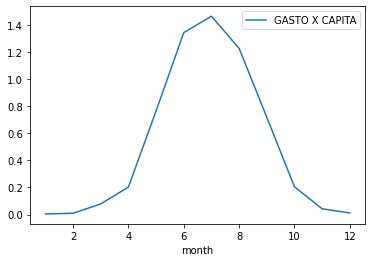

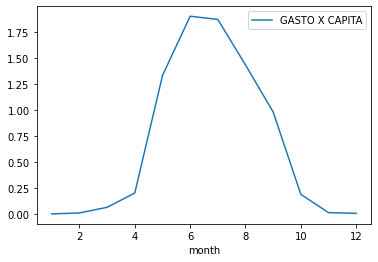

In [ ]:
datacard_h1_CI_grouped = datacard_h1_CI.groupby(['month']).mean()
datacard_h1_CI_grouped = datacard_h1_CI_grouped.drop(columns=['year'],errors='ignore')
datacard_h1_CI_grouped.plot(kind = 'line')

datacard_h2_CI_grouped = datacard_h2_CI.groupby(['month']).mean()
datacard_h2_CI_grouped = datacard_h2_CI_grouped.drop(columns=['year','cummulative_deaths_for_100k'],errors='ignore')
datacard_h2_CI_grouped.plot(kind = 'line')

The shape of both distributions are almost the same, while the second one, representing data from 2020, reaches higher values. This could be due to several reasons, like different political actions taken to foment the consumptions after the quarantine, or the increases in prices.

### 1.3.2. P-Value

As in this case, we have two different distributions (2018-2019 and 2020), we can use the T-student test to see if they are similar in some way or not:

In [ ]:
from scipy import stats

print("Std watermelon spend per capita in 2018-2019 estimate:", monthly_spend_per_capita_h1.std())
print("Std watermelon spend per capita in 2020 estimate:", monthly_spend_per_capita_h2.std())

stats.ttest_ind(monthly_spend_per_capita_h1, monthly_spend_per_capita_h2, equal_var = False)

Std watermelon spend per capita in 2018-2019 estimate: 0.5825764892348119
Std watermelon spend per capita in 2020 estimate: 0.7916820955554481


Ttest_indResult(statistic=-2.5759322709659465, pvalue=0.010449936543636868)

Since we have a t-test, we need to check if p/2 < 0.05, which is true in our case. This means that we can be certain that there is some difference between COVID and non-COVID years. However, we cannot tell if there is a change is seasonality or if it is just a change in value.

### 1.3.3. Conclusions

Neither confidence interval nor P-value gives us the certainty to confirm or reject the null hypothesis. However, those tools showed that there is some change in value between the years 2018-2019 and 2020. \

To provide more reliable results we will use other techniques, such as association rules and clustering.

# 2. Studying consumption patterns of watermelons during pandemic

Another objective that we had within this second line of work is to study whether there are consumption patterns related to the consumption of watermelons in Spain during pandemic.

In order to do so, we proposed two different ways of determining whether there are or not consumption patterns: association rules and clustering.

One thing to note is that clustering must be analised in order to really say that the clusters are related to consumption patterns (clusters are black boxes, there is no way to group them in the way we want, but if we study that the groups are related to consumption patterns, then we can obtain them those consumption patterns).

## 2.1. Association rules

After analyzing the second data card thanks to BigML to obtain the association rules, we can see the following:

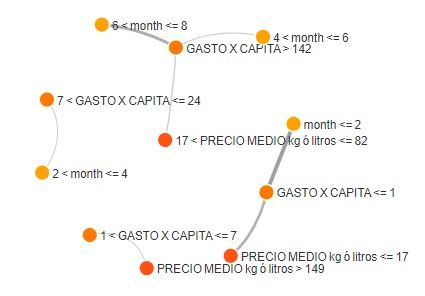

During January and February the consumption is very, very low, almost null. From that month to April we can see a consumption from 7 to 24, which also corresponds to the observations obtained from the 2018 and 2019 data. But the big difference occurs during the summer months: from May to August. During this months, the consumptions goes up to 142, which is way more than the 96€ minimum in the previous data.

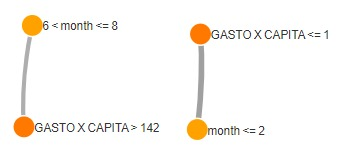

The two association rules above are the ones with the most leverage, which reinforces the previously stated assumptions. From all this information, we can infer what we extracted using the p-value and the confidence intervals: watermelon consumption in 2020 is very similar to the consumption in the previous years, but during summer, it goes even higher than in the previous records.

## 2.2. Clustering

The main purpose of datacard 2 clustering is to get watermelon consumption patterns during first year of Covid-19 pandemic and comparing them to the ones obtained in datacard 1 clustering. We've decided to perform same clustering methods as before.

### 2.2.1. BigML clustering

Again we are beginning with BigML clustering in order to see, whether it is even viable to study consumption patterns in this case or not. 

For clustering we've used not normalized datacard 2. This datacard has less rows (204) than the datacard 1, thus selecting k=3 as before resulted in creation of cluster with very different sizes (e.g. 12 instances and 110). That's why we decided to choose k=2.

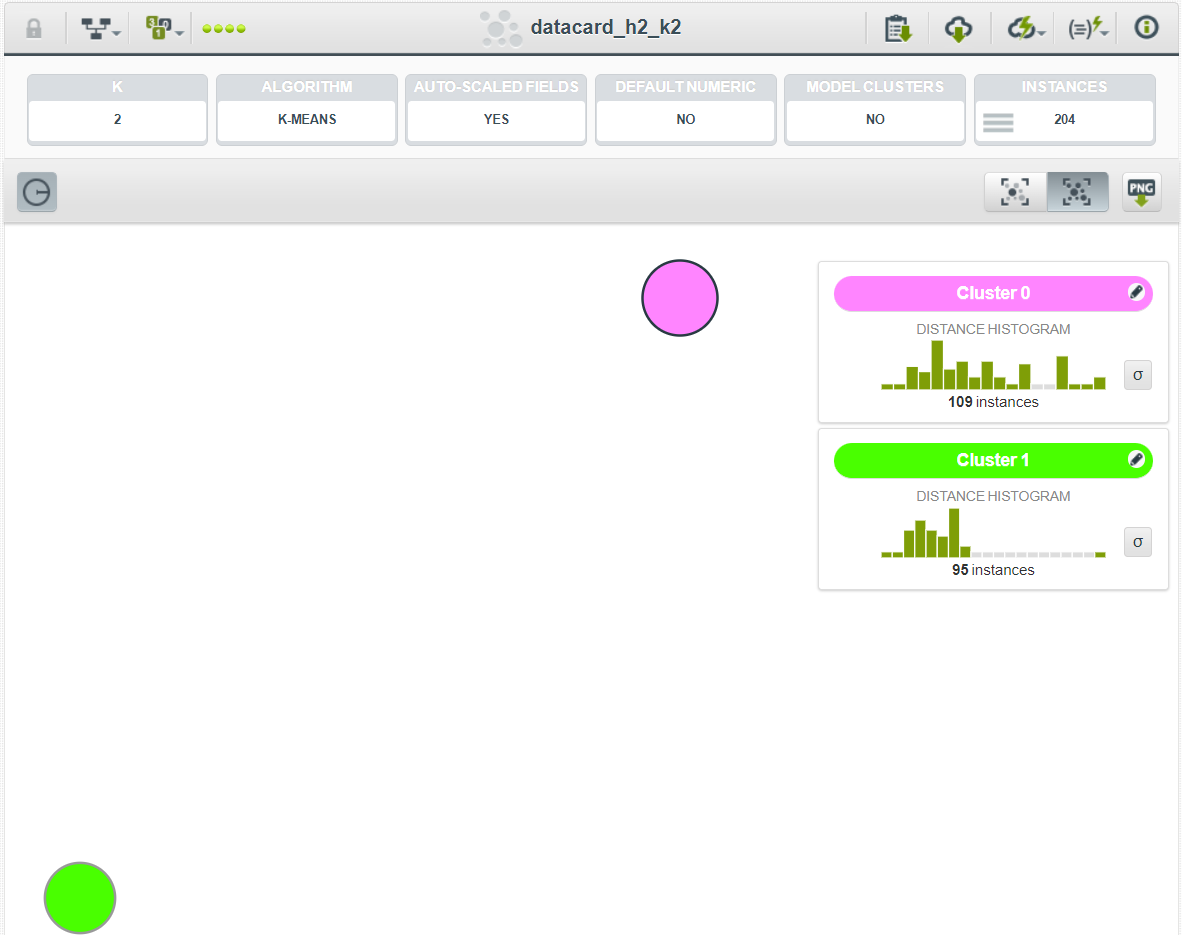

Same as before we used K-Means as the algorithm. As summary fields we selected month and year columns (so that they are treated as primary keys).

#### 2.2.1.1. Cluster 0

Below we can see the 'GASTO X CAPITA' versus 'month' scatter plot for the Cluster 0. This cluster consists of 109 rows from the datacard 2.

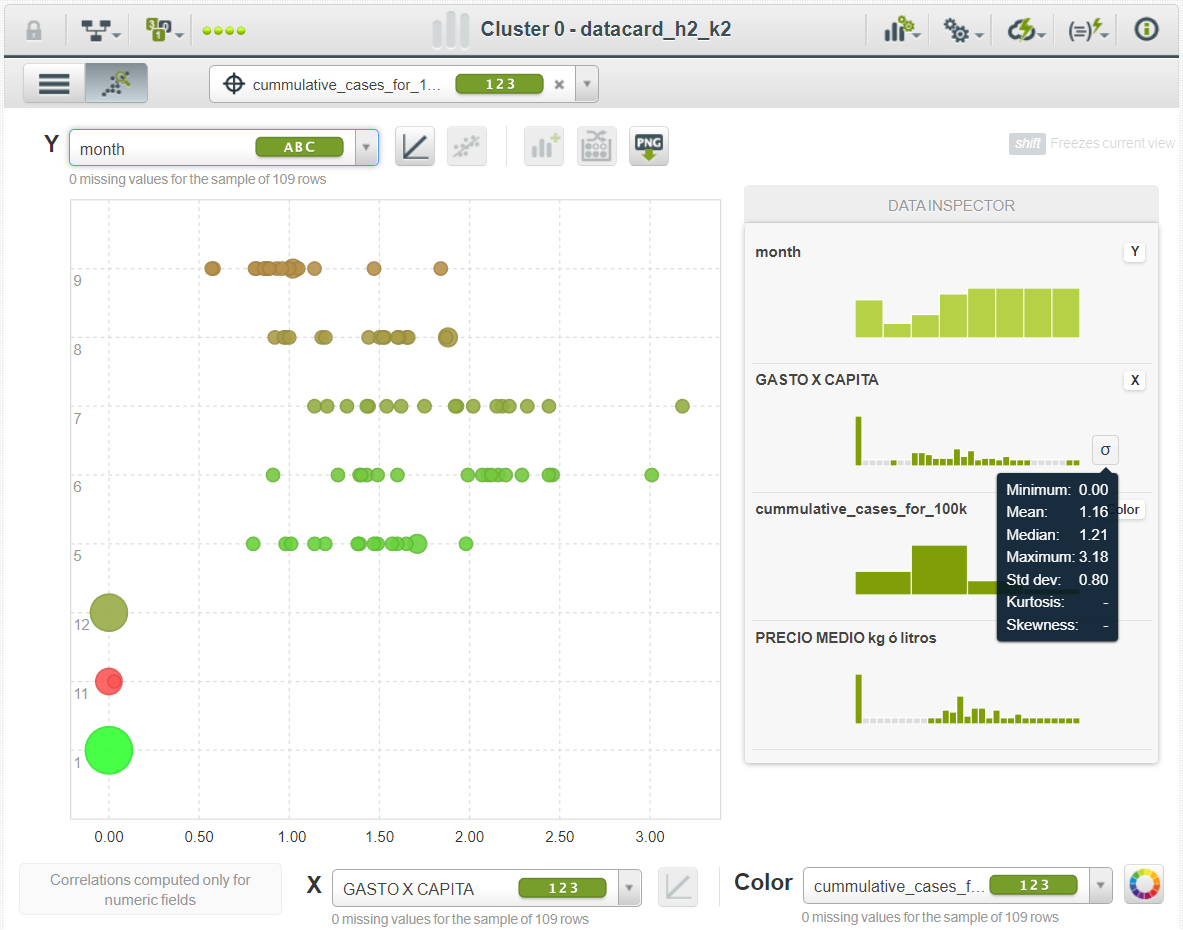

This cluster presents data from months 5 to 9 and 11 to 1. As we can see, during the warmer months, the consumption of watermelons is even bigger than in previous years in the same months. Interesting things happen in winter months (November, December and January) - the value of consumption is then equal 0. It is even lower than values from previous years. \
In this cluster the worst month when it comes to number of covid cases is November. If we were to connect high number of covid cases to lower watermelon demand, then value of consumption in September also should be low. Instead it is rather high, between 0.5 and 2.0.

Let's take a look at watermelon prices.

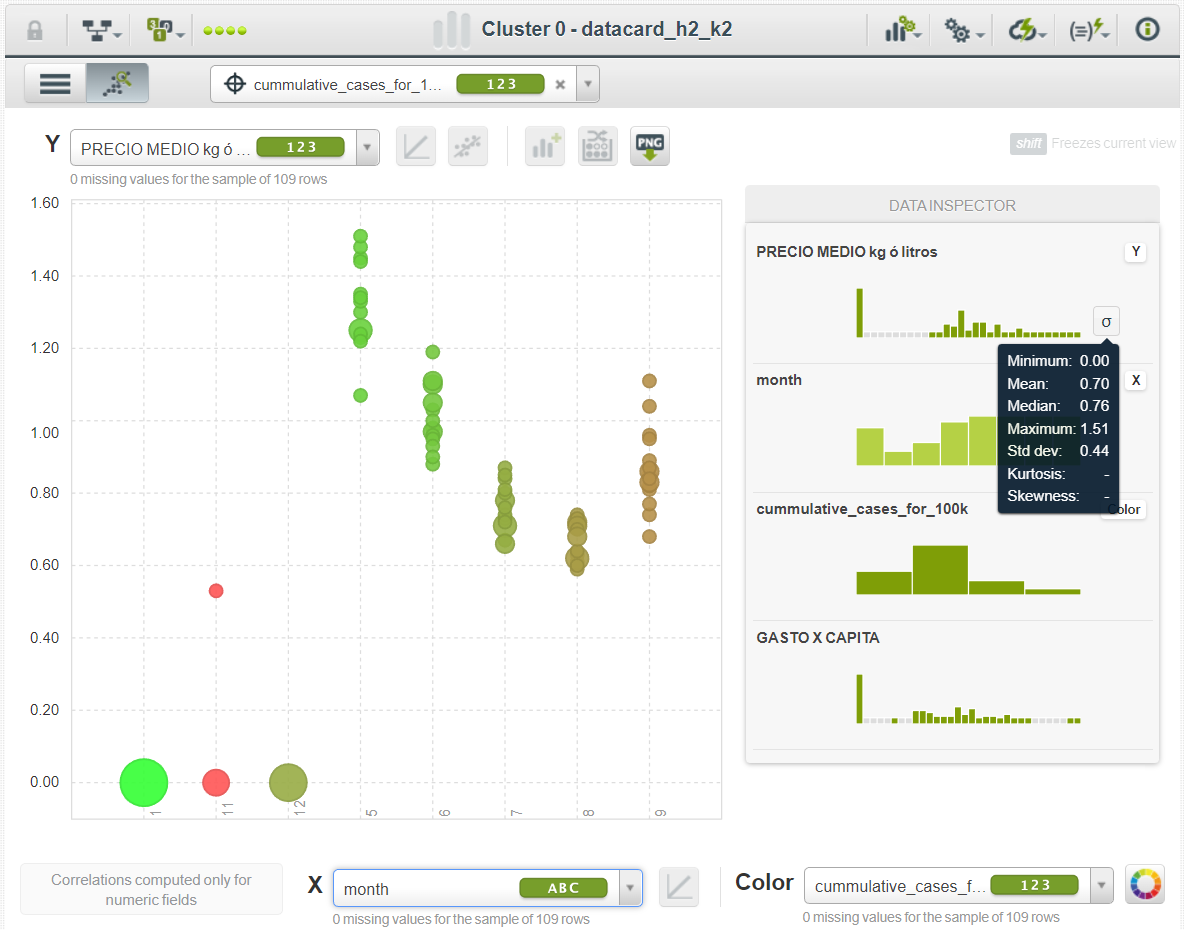

As we can see, the highest cost for a kg of watermelon is in May. Prices are slightly bigger in comparison to years without covid, but still those prices aren't that different. 

#### 2.2.1.2. Cluster 1

Below we can see the 'GASTO X CAPITA' versus 'month' scatter plot for the Cluster 1. This cluster is slightly smaller than cluster 0 and consists of 95 rows.

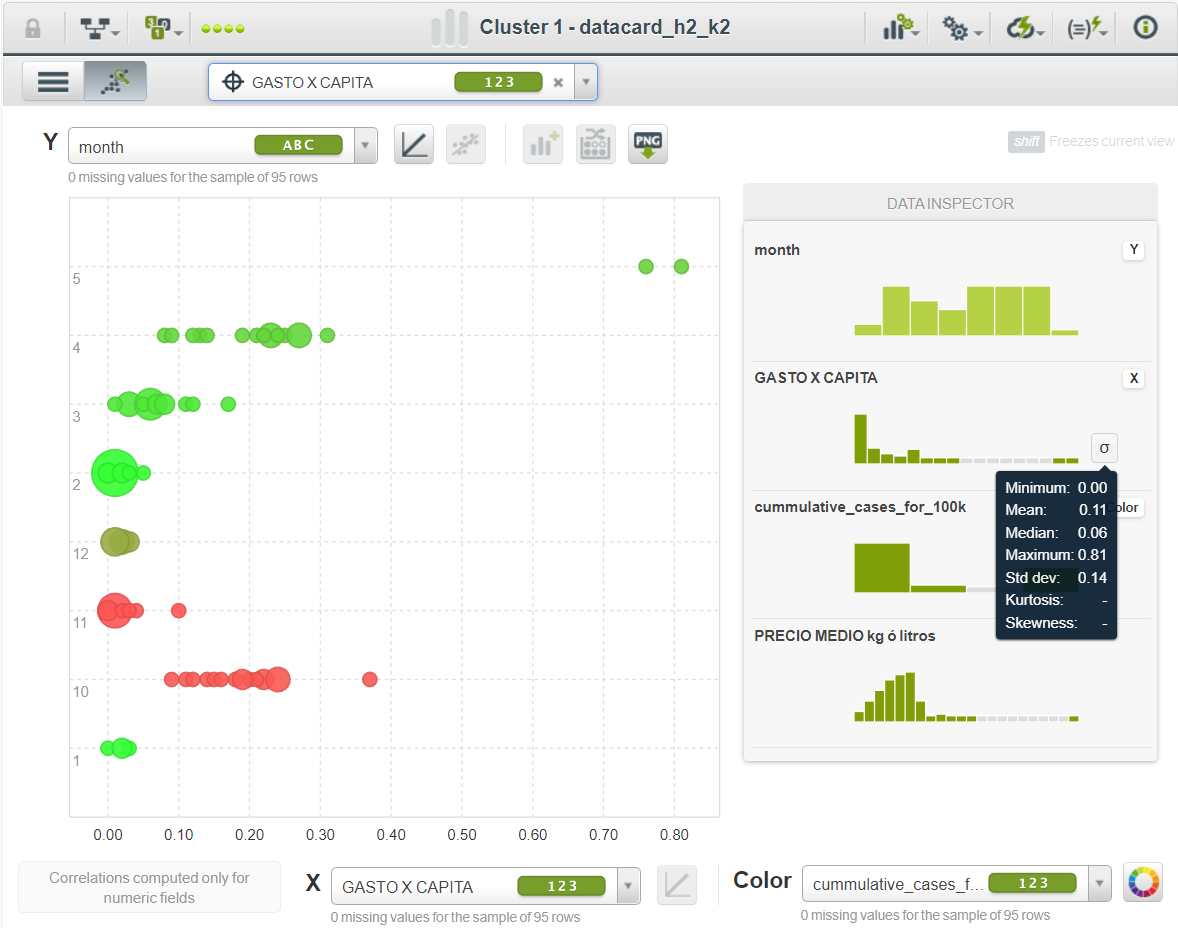

This cluster consists mostly of rows relating to months between October and May. As we can see, the greatest demand for watermelons was in October (in May we have only 2 instances) and is sligtly lower than in previous years in the same month. In the same time, months 10 and 11 are the worst in terms of number of covid cases per 100k.
Just as before, consumption in winter months (November to February) is very low, what can be due to that these month are not growing season for watermelons.

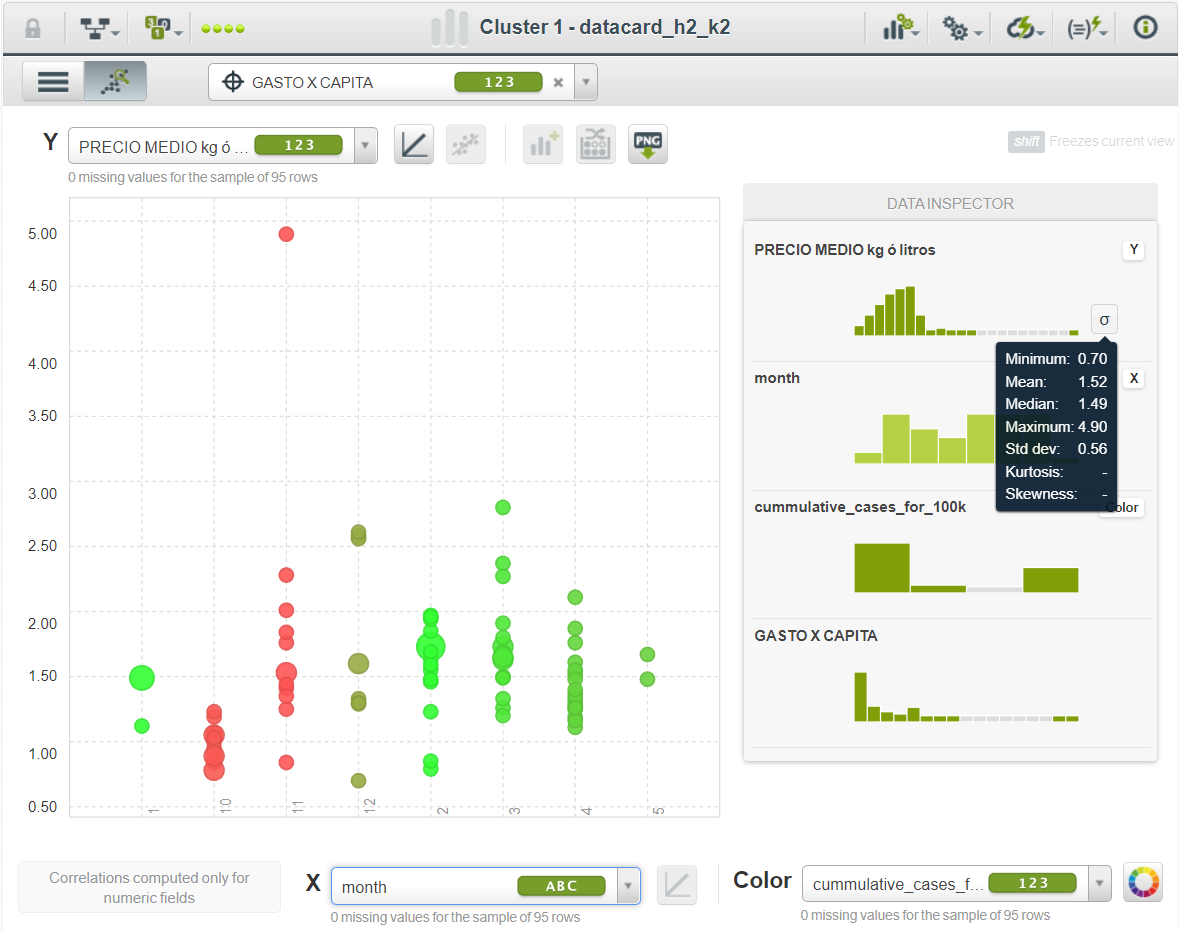

In comparison to previous years, prices in these months are greater than they used to be. For example, prices for kg of watermelon in November in previous years weren't greater than 1.5. Here the maximum price in November accounts to about 2.3, what is an increase of price for about 50%.

#### 2.2.1.3. BigML clustering Conclusions

During the high season, the demand for watermelons in 2020 was even higher than in years 2018-2019. The prices per kg in winter months also have risen. Number of covid cases seems to have no impact on watermelon consumption.

### 2.2.2. Sklearn


To adapt clustering to our needs, we've decided to use Sklearn for further parametrization. In that way we are able to obtain better results, thus interpretation will be more correct.

#### 2.2.2.1. Normalization

First, we have to standarize the data.

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
data_card_norm = scaler.fit_transform(datacard_h2)

data_card_norm

array([[-1.59325501, -0.84745016,  0.06061861, -1.33859587, -1.69896791],
       [-1.59325501, -0.82212534,  0.63687713, -1.33859587, -1.69896791],
       [-1.59325501, -0.82212534,  0.63687713, -1.33859587, -1.69896791],
       ...,
       [ 1.59325501, -0.84745016, -1.68373149,  0.19255355, -0.02782422],
       [ 1.59325501, -0.84745016, -1.68373149,  0.19255355, -0.02782422],
       [ 1.59325501, -0.80946294,  0.80819723,  0.19255355, -0.02782422]])

#### 2.2.2.2. PCA

Here we are executing PCA for clustering dataset.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(data_card_norm)
X_pca.shape

(204, 3)

And here we are executing PCA for visualization dataset.

In [ ]:
pca_viz = PCA(n_components=2)
X_pca_viz = pca_viz.fit_transform(data_card_norm)
X_pca_viz.shape

(204, 2)

#### 2.2.2.3. Data Vizualization

As the expense per capita is related with our hypothesis, we decided for validation of our clustering algorithms we will mostly focus on a graphs that represents the relation between Gasto x Capita and covid cases, and the relation between Gasto x Capita and month (the last two).

In [ ]:
import plotly.express as px
fig = px.scatter(x = X_pca_viz[:,0], y = X_pca_viz[:,1])
fig.show()

The graph made using PCA datasets is much harder to interpret, as they consist of too many dimensions, so we've decided to not consider them for results' analysis.

In this case we will focus on two last graphs representing relation between 'GASTO X CAPITA' and 'month' columns and also 'GASTO X CAPITA' and 'cummulative_cases_for_100k', because we want to find out how COVID-19 affected watermelon seasonality. 

In [ ]:
fig = px.scatter(datacard_h2, x=datacard_h2['cummulative_cases_for_100k'], y=datacard_h2['GASTO X CAPITA'], color=datacard_h2.month)
fig.show()

In [ ]:
fig = px.scatter(datacard_h2, x=datacard_h2['month'], y=datacard_h2['GASTO X CAPITA'])
fig.show()

#### 2.2.2.4. Choosing clustering algorithm

For clustering we've decided to use two clustering algorithms we saw on classes: KMeans and Agglomerative Clustering. Although with datacard 2 DBSCAN performs better than with the datacard 1, we still will not use it for the analysis, as it does not provide us with any useful information.

Although in BigML clustering we have chosen k=2, this time we decided to choose k=3 for clustering, as with this value better clusters are created.

##### 2.2.2.4.1. KMeans

KMeans offers more cutomization than BigML. As creating three clusters proved to be the best way of clustering our data (datacard 1 clustering), we've decided to use this particular algorithm here, on datacard 2, with the same value of k=3.

In [ ]:
from sklearn.cluster import KMeans

km  = KMeans(3)
labels = km.fit_predict(data_card_norm)

In [ ]:
fig = px.scatter(datacard_h2, x=datacard_h2['cummulative_cases_for_100k'], y=datacard_h2['GASTO X CAPITA'], color=labels)
fig.show()

In [ ]:
fig = px.scatter(datacard_h2, x=datacard_h2['month'], y=datacard_h2['GASTO X CAPITA'], color=labels)
fig.show()

On the first diagram ('GASTO X CAPITA' and 'cummulative_cases_for_100k') we can see, that clusters 0 and 1 are 'mixed' with each other, but on the second one ('GASTO X CAPITA' and 'month') they are not. It suggests, that the diagram which is the most valuable for our objective is the last one.

##### 2.2.2.4.2. DBSCAN

As stated before, we will not use DBSCAN for interpretation, as it performs worse than the other clustering algorithms.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.7, min_samples=8)
dbscan.fit(data_card_norm)

labels = dbscan.labels_
labels

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  4,  4,  4,  4,  4, -1,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5, -1,  5, -1,  5,  5,  5,  5, -1,  5,  5, -1,  5, -1,  5,  5,
       -1,  6,  6, -1, -1, -1, -1,  6,  6, -1, -1, -1,  6,  6,  6,  6, -1])

In [ ]:
fig = px.scatter(x = datacard_h2['month'], y = datacard_h2['GASTO X CAPITA'], color=labels)
fig.show()

##### 2.2.2.4.3. Agglomerative Clustering



Agglomerative Clustering is another algorithm which lets us choose the value of parameter k. Again, we will set it to three, because then we can achieve the best results.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
labels = ac.fit_predict(data_card_norm)

In [ ]:
fig = px.scatter(datacard_h2, x=datacard_h2['cummulative_cases_for_100k'], y=datacard_h2['GASTO X CAPITA'], color=labels)
fig.show()

In [ ]:
fig = px.scatter(datacard_h2, x=datacard_h2['month'], y=datacard_h2['GASTO X CAPITA'], color=labels)
fig.show()

Here happens the same thing as in KMeans algorithm - clusters are 1 and 2 'mixing' with each other (in 'GASTO X CAPITA' and 'cummulative_cases_for_100k' graph), thus, just as before, we will use the last diagram ('GASTO X CAPITA' and 'month') for interpretation.

#### 2.2.3. Sklearn clustering conclusion

After applying clustering with sklearn, we can conclude the following aspects:
1. Distribution of clusters created with KMeans and Agglomerative clustering methods are very similar - in both cases the first cluster is from January to April (for KMeans also a bit of May), the second cluster is from May to September and the third one is from October to December (for KMeans also a bit of September). 

2. Interestingly, diagrams obtained doing clustering for the datacard 2, are very similar to those made for datacard 1 - distribution of values is more or less the same, but what is important is that values in 'GASTO X CAPITA' column are higher for datacard 2 (when analysing same months).

3. It would suggest, that consumption of watermelons during Covid-19 pandemic was even higher, than in previous years. The seasonality of watermelons was not affected, it was the same as in previous years, thus our hipotesis was incorrect.

# 3. Line of work 2 conclusions

To conclude, we will sum up what we did:

1. We used a statistical approach to try to validate the hypothesis that watermelons seasonality has changed in 2020, due to COVID-19.

2. We tried to study the consumption patterns of watermelons using rules of association.

3. We used clustering algorithms for further studying the consumption patterns.

The conclusions that we can obtain related to the second line of work are the following ones:


- Watermelon seasonality has not changed during the COVID times, thus our null hypothesis is can be confirmed. In this case, we demonstrated that the expense per person of watermelons depends can be grouped into 3 seasons first from January to April, the second cluster from May to September, and the third one from October to December, which is the same as in the years 2018 and 2019

- The consumption patterns associated with the watermelons, are the same in the COVID year and non-COVID years. They are related to their seasonality. People tend to consume more watermelons in summer (which is why the expense per person is greater) while consuming fewer watermelons in other moments of the year (this is not related to the price per kg of watermelons, which could be higher than in summer).

- Moreover, we found out the interesting fact that the consumpiton of watermelons was higher during the pandemic.